In [1]:
##########################################
# Load Required Python Libraries
##########################################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
##########################################

In [2]:
##########################################
# Loads in Quora Dataset
##########################################
#Training Dataset
data = pd.read_csv('/Users/Priscilla/Desktop/QuoraDataset/train.csv')

#Drop irrelevant features
data = data.drop(['id', 'qid1', 'qid2'], axis=1)
##########################################

In [3]:
#Preview Data
data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
data.tail()

,question1,question2,is_duplicate
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


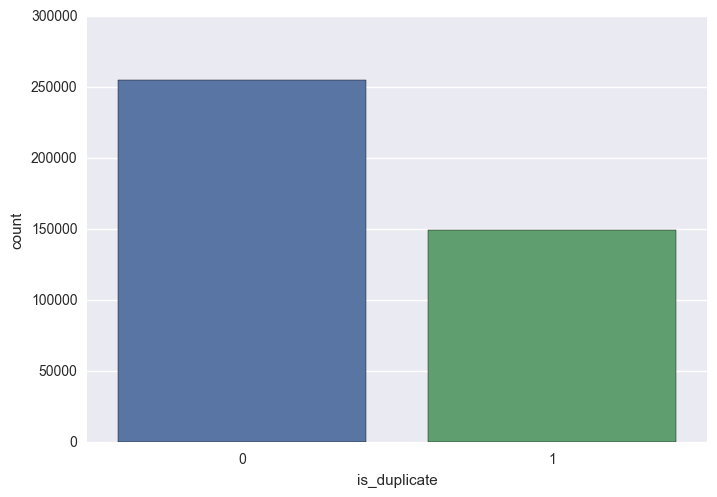

In [5]:
#Display the count of duplicate and non-duplicate observations in the dataset
sns.set(style="darkgrid")
sns.countplot(x="is_duplicate", data=data)
# sns.plt.show()

In [6]:
#Total observations in the dataset
len(data)

404290

In [7]:
##########################################
# Feature Engineering: Creating new input variables to improve ML algorithm performance
##########################################
#Feature: Length of Question
#Apply length function to every data.question1 & data.question2 observation
data['len_q1'] = data.question1.apply(lambda x: len(str(x)))
data['len_q2'] = data.question2.apply(lambda x: len(str(x)))

#Feature: Difference in length between the Questions
#Substract len_q1 from len_q2
data['len_diff'] = data.len_q1 - data.len_q2

#Feature: Character count of Question
#Strip whitespace in data.question1 & data.question2 and apply the length function
data['len_char_q1'] = data.question1.apply(lambda x: len(str(x).replace(' ', '')))
data['len_char_q2'] = data.question2.apply(lambda x: len(str(x).replace(' ', '')))

#Feature: Word count of Question
#Call split function on every data.question1 & data.question2 observation and apply the length function
data['len_word_q1'] = data.question1.apply(lambda x: len(str(x).split()))
data['len_word_q2'] = data.question2.apply(lambda x: len(str(x).split()))

#Feature: Common words between the Questions
#Intersection of data.question1 and data.question2
#Set function is applied so repeated words in a question is omitted from the final common word count
#Axis=1 to calculate the means column-wise (-->) rather than the default of Axis=0 to calculate the means row-wise(v)
data['len_common_words'] = data.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)
##########################################

In [8]:
#Preview newly added features to the dataset
pd.options.display.max_colwidth = 100
data.head()

,question1,question2,is_duplicate,len_q1,len_q2,len_diff,len_char_q1,len_char_q2,len_word_q1,len_word_q2,len_common_words
0,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,66,57,9,53,46,14,12,10
1,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,51,88,-37,44,76,8,13,4
2,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,73,59,14,60,50,14,10,4
3,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,50,65,-15,40,57,11,9,0
4,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,76,39,37,64,33,13,7,2


In [9]:
data.tail()

,question1,question2,is_duplicate,len_q1,len_q2,len_diff,len_char_q1,len_char_q2,len_word_q1,len_word_q2,len_common_words
404285,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0,85,79,6,72,67,14,13,11
404286,Do you believe there is life after death?,Is it true that there is life after death?,1,41,42,-1,34,34,8,9,5
404287,What is one coin?,What's this coin?,0,17,17,0,14,15,4,3,1
404288,"What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?",I am having little hairfall problem but I want to use hair styling product. Which one should I p...,0,94,127,-33,78,103,17,25,1
404289,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0,37,45,-8,30,36,8,10,8


In [10]:
#Features of the training dataset
data.ix[:,'len_q1':].head()

,len_q1,len_q2,len_diff,len_char_q1,len_char_q2,len_word_q1,len_word_q2,len_common_words
0,66,57,9,53,46,14,12,10
1,51,88,-37,44,76,8,13,4
2,73,59,14,60,50,14,10,4
3,50,65,-15,40,57,11,9,0
4,76,39,37,64,33,13,7,2


In [11]:
data.ix[:,'len_q1':].tail()

,len_q1,len_q2,len_diff,len_char_q1,len_char_q2,len_word_q1,len_word_q2,len_common_words
404285,85,79,6,72,67,14,13,11
404286,41,42,-1,34,34,8,9,5
404287,17,17,0,14,15,4,3,1
404288,94,127,-33,78,103,17,25,1
404289,37,45,-8,30,36,8,10,8


In [12]:
#Outcome variable of the training dataset
data.ix[:,'is_duplicate'].head()

0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [13]:
data.ix[:,'is_duplicate'].tail()

404285    0
404286    1
404287    0
404288    0
404289    0
Name: is_duplicate, dtype: int64

In [14]:
##########################################
# Split the dataset into training and testing datasets
##########################################
#Loads the library required for splitting the dataset
from sklearn.model_selection import train_test_split

features = data.ix[:,'len_q1':]
y = data.ix[:,'is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2)
##########################################

In [15]:
#Preview Training Dataset and Outcome Variable
X_train.head()

,len_q1,len_q2,len_diff,len_char_q1,len_char_q2,len_word_q1,len_word_q2,len_common_words
206643,36,52,-16,30,43,7,10,3
241611,85,84,1,72,71,14,14,12
332384,74,33,41,64,29,11,5,2
293384,45,36,9,37,30,9,7,4
395438,24,36,-12,21,32,4,5,3


In [16]:
y_train.head()

206643    0
241611    1
332384    0
293384    1
395438    1
Name: is_duplicate, dtype: int64

In [17]:
#Preview Testing Dataset and Outcome Variable
X_test.head()

,len_q1,len_q2,len_diff,len_char_q1,len_char_q2,len_word_q1,len_word_q2,len_common_words
389038,37,30,7,29,24,9,7,5
170250,58,78,-20,50,67,9,12,1
361248,43,34,9,37,29,7,6,4
114269,39,38,1,34,33,6,6,5
7139,120,19,101,107,16,14,4,0


In [18]:
y_test.head()

389038    0
170250    0
361248    1
114269    0
7139      0
Name: is_duplicate, dtype: int64

In [19]:
##########################################
# Random Forest Classifier
##########################################
#Loads required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Create a Random Forest Classifer (clf by convention = 'classifier')
clf = RandomForestClassifier(n_jobs=2) #n_jobs = # of jobs in run in parallel for fit and predict

#Train the Random Forest Classifier
clf.fit(X_train, y_train)
##########################################

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
##########################################
# Apply Random Forest Classifer on the testing split of the dataset
##########################################
#Predicts the outcome variable of the testing split of the dataset
test_prediction = clf.predict(X_test)

#Prediction probability for the value of the outcome variable (0 or 1)
test_prediction_proba = clf.predict_proba(X_test)
##########################################

In [21]:
#Preview Prediction
test_prediction[0:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [22]:
#Preview the Prediction Probability [0, 1]
test_prediction_proba[0:10]

array([[ 0.14      ,  0.86      ],
       [ 1.        ,  0.        ],
       [ 0.675     ,  0.325     ],
       [ 0.27164225,  0.72835775],
       [ 1.        ,  0.        ],
       [ 0.1       ,  0.9       ],
       [ 0.18690476,  0.81309524],
       [ 1.        ,  0.        ],
       [ 0.33333333,  0.66666667],
       [ 0.44236597,  0.55763403]])

In [23]:
#Preview actual value
y_test.head()

389038    0
170250    0
361248    1
114269    0
7139      0
Name: is_duplicate, dtype: int64

In [24]:
#Displays Results in a Confusion Matrix
#Anything on the diagonal was classified correctly and anything off the diagonal was classified incorrectly
pd.crosstab(y_test, test_prediction, rownames=['Actual Similarity'], colnames=['Predicted Similarity'])

Predicted Similarity,0,1
Actual Similarity,,
0,39410,11797
1,13279,16372


In [25]:
#Displays a list of features that were the most important in affecting the accuracy of the classification
important_features = list(zip(X_train, clf.feature_importances_))
important_features

[('len_q1', 0.098446616535245363),
 ('len_q2', 0.11629311759340374),
 ('len_diff', 0.12584728756005958),
 ('len_char_q1', 0.11278620299254034),
 ('len_char_q2', 0.11272551694628405),
 ('len_word_q1', 0.082042902310849292),
 ('len_word_q2', 0.081952688368133547),
 ('len_common_words', 0.26990566769348401)]

In [26]:
#Displays the accuracy score of the Random Forest Classifier on the test split
clf_accuracy = accuracy_score(y_test, test_prediction)
clf_accuracy

0.68987607905216553

In [27]:
##########################################
# Loads in Quora Test Dataset
##########################################
#Test Dataset
data_test = pd.read_csv('/Users/Priscilla/Desktop/QuoraDataset/test.csv')
##########################################

In [28]:
#Preview Test Dataset
data_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?
2,2,What but is the best way to send money from China to the US?,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [29]:
data_test.tail()

,test_id,question1,question2
2345791,2345791,How do Peaks (TV series): Why did Leland kill Laura Palmer?,What is the most study scene in twin peaks?
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,2345793,What are some famous Romanian drinks (alcoholic & non-alcoholic)?,Can a non-alcoholic restaurant be a huge success?
2345794,2345794,"What were the best and worst things about public transit in Proddatur, Andhra Pradesh, India? Ho...","What are the best and worst things examination public transit in Visakhapatnam, Andhra Pradesh, ..."
2345795,2345795,What is the best medication equation erectile dysfunction?,How do I out get rid of Erectile Dysfunction?


In [30]:
##########################################
# Feature Engineering: Creating new input variables to improve ML algorithm performance
##########################################
#Feature: Length of Question
#Apply length function to every data.question1 & data.question2 observation
data_test['len_q1'] = data_test.question1.apply(lambda x: len(str(x)))
data_test['len_q2'] = data_test.question2.apply(lambda x: len(str(x)))

#Feature: Difference in length between the Questions
#Substract len_q1 from len_q2
data_test['len_diff'] = data_test.len_q1 - data_test.len_q2

#Feature: Character count of Question
#Strip whitespace in data.question1 & data.question2 and apply the length function
data_test['len_char_q1'] = data_test.question1.apply(lambda x: len(str(x).replace(' ', '')))
data_test['len_char_q2'] = data_test.question2.apply(lambda x: len(str(x).replace(' ', '')))

#Feature: Word count of Question
#Call split function on every data.question1 & data.question2 observation and apply the length function
data_test['len_word_q1'] = data_test.question1.apply(lambda x: len(str(x).split()))
data_test['len_word_q2'] = data_test.question2.apply(lambda x: len(str(x).split()))

#Feature: Common words between the Questions
#Intersection of data.question1 and data.question2
#Set function is applied so repeated words in a question is omitted from the final common word count
#Axis=1 to calculate the means column-wise (-->) rather than the default of Axis=0 to calculate the means row-wise(v)
data_test['len_common_words'] = data_test.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)
##########################################

In [31]:
#Preview newly added features to the test dataset
data_test.head()

,test_id,question1,question2,len_q1,len_q2,len_diff,len_char_q1,len_char_q2,len_word_q1,len_word_q2,len_common_words
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?,57,68,-11,47,55,11,14,2
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?,66,43,23,53,37,14,7,4
2,2,What but is the best way to send money from China to the US?,What you send money to China?,60,29,31,47,24,14,6,4
3,3,Which food not emulsifiers?,What foods fibre?,27,17,10,24,15,4,3,0
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,32,30,2,29,25,4,6,3


In [32]:
data_test.tail()

,test_id,question1,question2,len_q1,len_q2,len_diff,len_char_q1,len_char_q2,len_word_q1,len_word_q2,len_common_words
2345791,2345791,How do Peaks (TV series): Why did Leland kill Laura Palmer?,What is the most study scene in twin peaks?,59,43,16,49,35,11,9,0
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?,49,38,11,41,34,9,5,1
2345793,2345793,What are some famous Romanian drinks (alcoholic & non-alcoholic)?,Can a non-alcoholic restaurant be a huge success?,65,49,16,57,42,9,8,0
2345794,2345794,"What were the best and worst things about public transit in Proddatur, Andhra Pradesh, India? Ho...","What are the best and worst things examination public transit in Visakhapatnam, Andhra Pradesh, ...",119,128,-9,100,109,20,20,17
2345795,2345795,What is the best medication equation erectile dysfunction?,How do I out get rid of Erectile Dysfunction?,58,45,13,51,37,8,9,2


In [33]:
##########################################
# Apply Random Forest Classifer on the Test Dataset
##########################################
#Features of the test dataset
data_test_features = data_test.ix[:,'len_q1':]

#Predicts the outcome variable of the Test Dataset
test_prediction = clf.predict(data_test_features)

#Prediction probability for the value of the outcome variable (0 or 1)
test_prediction_proba = clf.predict_proba(data_test_features)
##########################################